# Emotion Classification in short texts with BERT

Applying BERT to the problem of multiclass text classification. Our dataset consists of written dialogs, messages and short stories. Each dialog utterance/message is labeled with one of the five emotion categories: joy, anger, sadness, fear, neutral.

## Workflow:
1. Import Data
2. Data preprocessing and downloading BERT
3. Training and validation
4. Saving the model

Multiclass text classification with BERT and [ktrain](https://github.com/amaiya/ktrain). Use google colab for a free GPU

In [1]:
# install ktrain on Google Colab
!pip3 install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 72.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 85.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 62.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 117.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 100.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np

import ktrain
from ktrain import text

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 1. Import Data

In [3]:
# data_train = pd.read_csv('data_train.csv', encoding='utf-8')
# data_test = pd.read_csv('data_test.csv', encoding='utf-8')

# X_train = data_train.Text.tolist()
# X_test = data_test.Text.tolist()

# y_train = data_train.Emotion.tolist()
# y_test = data_test.Emotion.tolist()

# data = data_train.append(data_test, ignore_index=True)

# class_names = ['joy', 'sadness', 'fear', 'anger', 'neutral']

# print('size of training set: %s' % (len(data_train['Text'])))
# print('size of validation set: %s' % (len(data_test['Text'])))
# print(data.Emotion.value_counts())

# data.head(10)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('NLP_DATASET.csv', encoding='utf-8')

# Splitting the dataset into training and testing sets
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

X_train = data_train.Text.tolist()
X_test = data_test.Text.tolist()

y_train = data_train.Emotion.tolist()
y_test = data_test.Emotion.tolist()

class_names = ['joy', 'sadness', 'fear', 'anger', 'disgust', 'shame', 'guilt','neutral']

print('Size of training set:', len(data_train))
print('Size of validation set:', len(data_test))
print(data_train.Emotion.value_counts())

data_train.head(10)  # Display the first 10 rows of the training dataset


Size of training set: 12325
Size of validation set: 3082
sadness    2181
joy        2171
anger      2087
fear       2059
neutral    1275
disgust     876
shame       844
guilt       832
Name: Emotion, dtype: int64


,Emotion,Text
4265,joy,I was talking to a friend and he said somethin...
8573,sadness,"Loneliness, being uncertain of myself in the A..."
1208,shame,"I feel guilty as I am not working, and even my..."
5863,shame,When I could not pass my exams with good marks...
424,joy,"When I began dansing, the teacher came and tol..."
554,shame,"At using other people, because of sexual exper..."
2992,sadness,This feeling was quite deep when my friend (gi...
1954,disgust,While watching a film of an experimental opera...
8260,sadness,Several years ago my mother died. She had been...
9509,anger,They soud like the neighbours from hell !


In [5]:
encoding = {
    'joy': 0,
    'sadness': 1,
    'fear': 2,
    'anger': 3,
    'disgust': 4,
    'shame' : 5,
    'guilt' : 6,
    'neutral' : 7
}

# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

## 2. Data preprocessing

* The text must be preprocessed in a specific way for use with BERT. This is accomplished by setting preprocess_mode to ‘bert’. The BERT model and vocabulary will be automatically downloaded

* BERT can handle a maximum length of 512, but let's use less to reduce memory and improve speed.

In [6]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350,
                                                                       max_features=35000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


##3. EXPLORATORY DATA ANALYSIS

In [7]:
!pip install matplotlib seaborn wordcloud


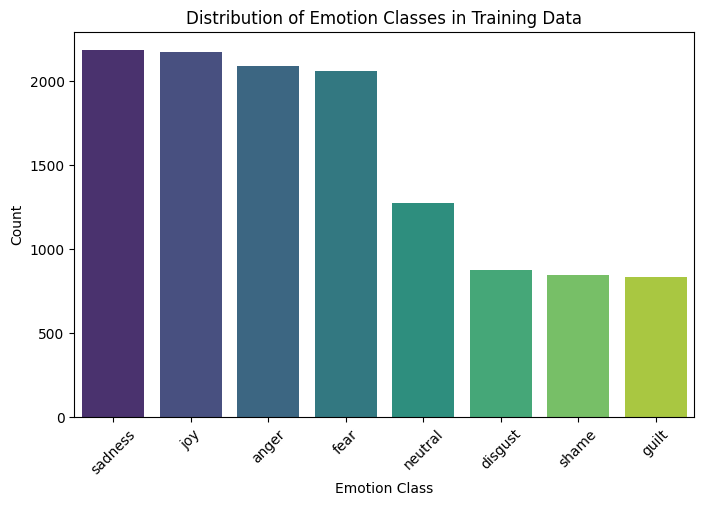

In [8]:
import seaborn as sns

# Count the occurrences of each emotion class
emotion_counts = data_train['Emotion'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.xlabel('Emotion Class')
plt.ylabel('Count')
plt.title('Distribution of Emotion Classes in Training Data')
plt.xticks(rotation=45)
plt.show()


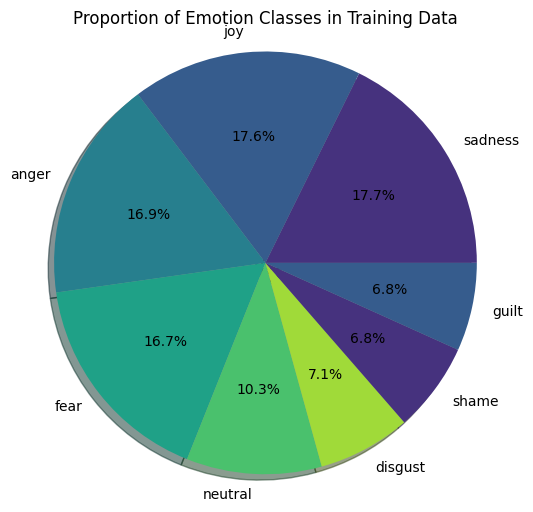

In [9]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), shadow=True)
plt.title('Proportion of Emotion Classes in Training Data')
plt.axis('equal')
plt.show()


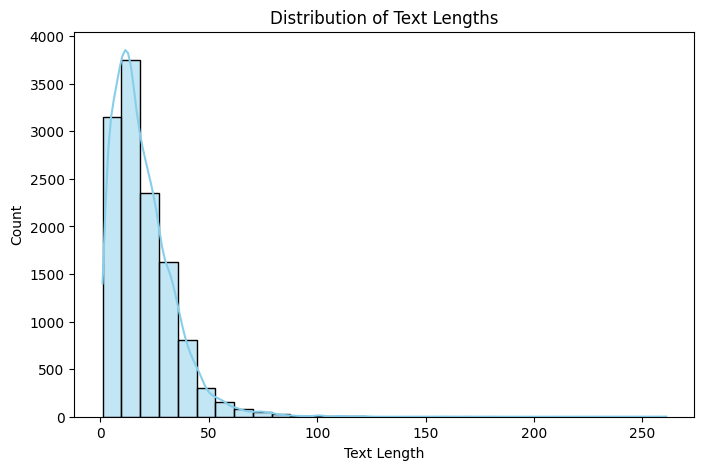

In [10]:
# Calculate the lengths of each text in the training data
text_lengths = data_train['Text'].apply(lambda x: len(x.split()))

# Create a histogram
plt.figure(figsize=(8, 5))
sns.histplot(text_lengths, bins=30, kde=True, color='skyblue')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Distribution of Text Lengths')
plt.show()


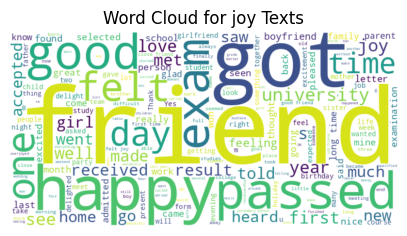

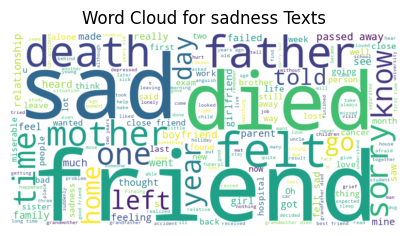

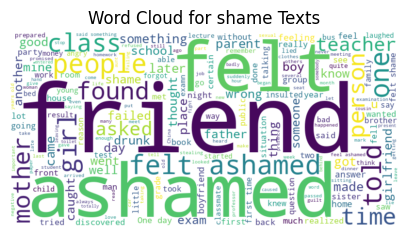

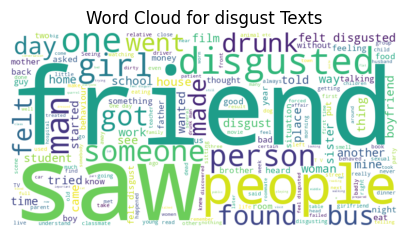

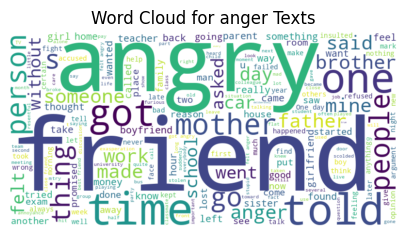

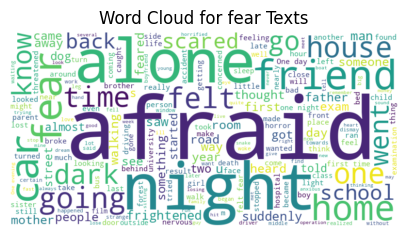

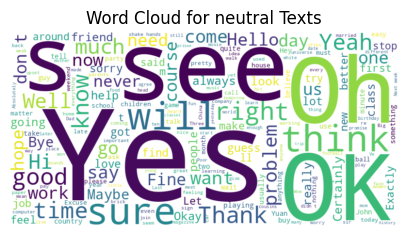

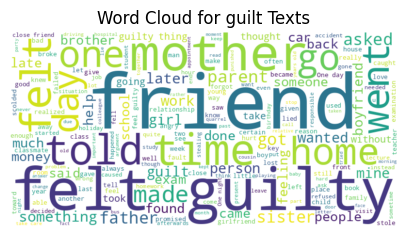

In [11]:

# Calculate the number of words in each text
data_train['Word Count'] = data_train['Text'].apply(lambda x: len(x.split()))

# Word cloud for each emotion class
emotions = data_train['Emotion'].unique()
for emotion in emotions:
    text_corpus = ' '.join(data_train[data_train['Emotion'] == emotion]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)
    plt.figure(figsize=(5, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {emotion} Texts')
    plt.show()




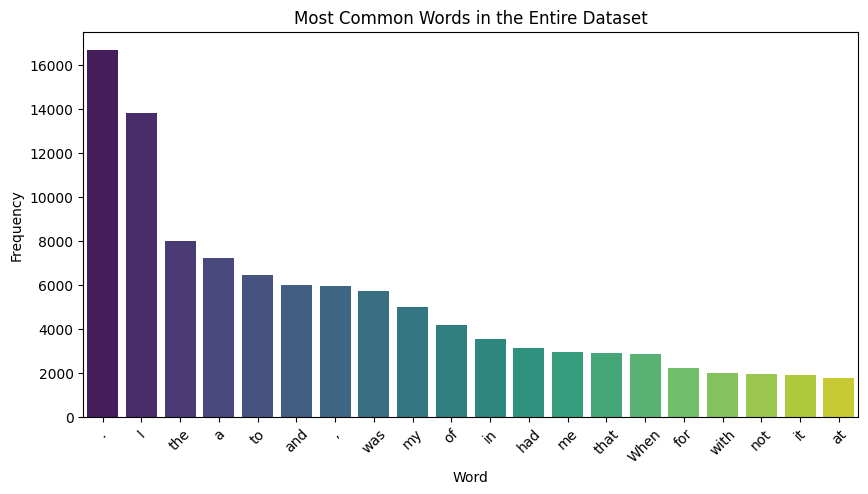

In [12]:
# Analyze the most common words in the entire dataset
all_text = ' '.join(data_train['Text'])
tokens = word_tokenize(all_text)
word_counter = Counter(tokens)
most_common_words = word_counter.most_common(20)

plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words], palette='viridis')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Common Words in the Entire Dataset')
plt.xticks(rotation=45)
plt.show()



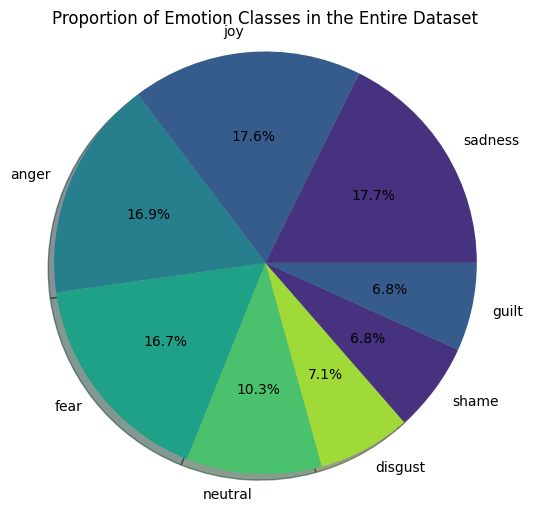

In [13]:
# Proportion of each emotion class in the entire dataset
emotion_proportions = data_train['Emotion'].value_counts(normalize=True)

plt.figure(figsize=(6, 6))
plt.pie(emotion_proportions, labels=emotion_proportions.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), shadow=True)
plt.title('Proportion of Emotion Classes in the Entire Dataset')
plt.axis('equal')
plt.show()



## 4. Training and validation


Loading the pretrained BERT for text classification

In [14]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


Wrap it in a Learner object

In [15]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=6)

In [16]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/1024
2055/2055 [==============================] - 760s 356ms/step - loss: 11.2554 - accuracy: 0.2520


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


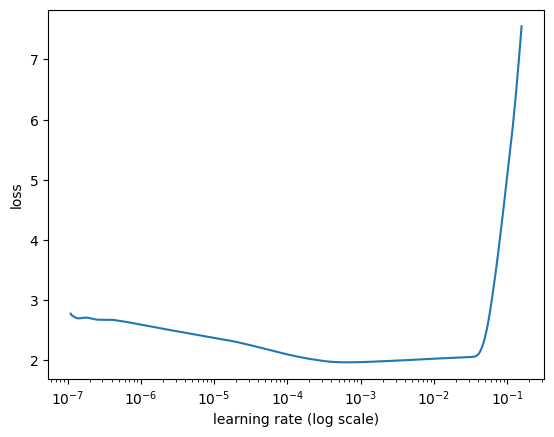

In [17]:
learner.lr_plot()

Train the model. More about tuning learning rates [here](https://github.com/amaiya/ktrain/blob/master/tutorial-02-tuning-learning-rates.ipynb)

In [ ]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
2055/2055 [==============================] - 1223s 586ms/step - loss: 1.2391 - accuracy: 0.5710 - val_loss: 0.7723 - val_accuracy: 0.7485
Epoch 2/3
2055/2055 [==============================] - 1196s 582ms/step - loss: 0.5970 - accuracy: 0.8009 - val_loss: 0.5921 - val_accuracy: 0.8076
Epoch 3/3
2055/2055 [==============================] - ETA: 0s - loss: 0.2397 - accuracy: 0.9237

Validation

In [ ]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

#### Testing with other inputs

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

In [21]:
import time

message = input("Enter your text: ")

start_time = time.time()
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

Enter your text: i am happy i didnt go to college today
predicted: joy (0.12)


## 5. Saving Bert model


In [22]:
# let's save the predictor for later use
predictor.save("mod")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Done! to reload the predictor use: ktrain.load_predictor